# Multivariate Analysis
Lola Pwasanga
A CFG PROJECT


Multivariate statistics - to see if patterns between race and COVID-19 
susceptibility be explained by other factors, such as socioeconomic 
background/underlying medical conditions

Can patterns between race and COVID-19 susceptibility be 
explained by other factors such as socioeconomic 
background/underlying medical conditions?
 Steps:
 bivariate/ multivariate heat map to check corrolations
 multivariate for regression and causality

# Questions
Is there a relationship between BAME and Covid deaths?
How strong is that relationship?
Which other factors along with BAME contribute to Covid deaths?
What is the effect of each of these factors on Covid deaths?
Given a certain proportion of bame  , can covid deaths be predicted?

In [ ]:
null hypothesis:
There is no relationship between the bame  group (blacks and minority ethnic) and Covid deaths
β1  equals zero
alternative hypothesis:
There is a relationship between the bame  group (blacks and minority ethnic) and Covid deaths
β1  is not equal to zero

In [2]:
import numpy
numpy.__version__

'1.21.5'

In [119]:
import sys
!{sys.executable} -m pip install seaborn

In [3]:
import numpy as np

In [185]:
import pandas as pd
import  numpy as np
import  statsmodels.api as sm
import  matplotlib.pyplot as plt

import seaborn as sns
import math



# Correlation analysis

In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv('C:/Users/TEMP/OneDrive/Desktop/cfg degree/specialisation/projectteam/complete_agg_new.csv')
data.head()



,LocalAuthority,Region,Borough,Code,Child_poverty_sum,deprivationscore,sumdeaths,sumdeaths_perthousand,all_bame,all_black,...,total_patients,Hypertensionsum,Obesitysum,Diabetessum,Asthmasum,heart_diseasesum,sum_population,sum_over70,sum_at_risk_jobs,sum_insecure
0,City of London,Central,City of London,E09000001,0.053,88.8,3,0.345,0.214,0.026,...,8584,7.95,3.62,2.70,3.08,1.50,8706,0.124,0.121,0.078
1,Barking and Dagenham,East,Barking and Dagenham,E09000002,5.770,3617.2,103,11.034,9.147,4.451,...,235900,216.29,178.67,116.51,87.81,34.45,211998,1.468,7.202,7.189
2,Barnet,North,Barnet,E09000003,5.212,3366.0,287,30.159,14.662,3.143,...,425715,432.72,205.71,192.08,163.45,90.85,392140,4.291,10.516,8.467
3,Bexley,East,Bexley,E09000004,4.128,2318.9,125,14.651,5.020,2.320,...,253510,340.40,207.41,137.76,119.53,65.40,247258,3.474,7.885,6.616
4,Brent,West,Brent,E09000005,6.060,4359.3,304,31.099,21.737,6.291,...,405143,363.38,200.75,208.16,131.34,61.78,330795,2.919,9.036,9.363


In [222]:
#final = data.iloc[:,[4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
final = data[['allindian','pakistaniOR_Bangladeshi','all_black','all_bame','Diabetessum','heart_diseasesum','sum_over70','sum_insecure','Child_poverty_sum', 'deprivationscore', 'sumdeaths','total_patients','Hypertensionsum','Obesitysum','Asthmasum','sum_at_risk_jobs','sum_population']]

print(final)

    allindian  pakistaniOR_Bangladeshi  all_black  all_bame  Diabetessum  \
0       0.029                    0.034      0.026     0.214         2.70   
1       0.862                    1.805      4.451     9.147       116.51   
2       3.154                    0.869      3.143    14.662       192.08   
3       0.858                    0.181      2.320     5.020       137.76   
4       6.457                    1.786      6.291    21.737       208.16   
5       0.769                    0.289      2.280     5.988       166.48   
6       0.793                    1.777      2.263     9.453        92.03   
7       2.941                    1.580      8.647    19.315       216.85   
8       5.240                    1.786      4.091    19.193       220.49   
9       1.347                    0.922      5.948    13.692       197.89   
10      0.973                    0.513      5.825    11.644       154.26   
11      0.870                    0.923      6.508    12.723       122.00   
12      0.46

In [223]:
#PERCENTAGE MISSING VALUES
final.isnull().sum()/len(final)*100


allindian                  0.0
pakistaniOR_Bangladeshi    0.0
all_black                  0.0
all_bame                   0.0
Diabetessum                0.0
heart_diseasesum           0.0
sum_over70                 0.0
sum_insecure               0.0
Child_poverty_sum          0.0
deprivationscore           0.0
sumdeaths                  0.0
total_patients             0.0
Hypertensionsum            0.0
Obesitysum                 0.0
Asthmasum                  0.0
sum_at_risk_jobs           0.0
sum_population             0.0
dtype: float64

In [188]:
# get further information about columns
final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   all_bame                 33 non-null     float64
 1   allindian                33 non-null     float64
 2   pakistaniOR_Bangladeshi  33 non-null     float64
 3   all_black                33 non-null     float64
 4   all_bame                 33 non-null     float64
 5   Diabetessum              33 non-null     float64
 6   heart_diseasesum         33 non-null     float64
 7   sum_over70               33 non-null     float64
 8   sum_insecure             33 non-null     float64
 9   Child_poverty_sum        33 non-null     float64
 10  deprivationscore         33 non-null     float64
 11  sumdeaths                33 non-null     int64  
 12  total_patients           33 non-null     int64  
 13  Hypertensionsum          33 non-null     float64
 14  Obesitysum               33 

In [224]:
#checks for duplicates
final.duplicated().sum()



0

In [225]:
# statistics for coviddeaths # dependent variable
final.sumdeaths.describe()


count     33.00000
mean     150.00000
std       65.81888
min        3.00000
25%      103.00000
50%      146.00000
75%      172.00000
max      304.00000
Name: sumdeaths, dtype: float64

In [226]:
final.all_bame.describe()

count    33.000000
mean     11.742364
std       5.910757
min       0.214000
25%       7.298000
50%      12.235000
75%      15.069000
max      26.204000
Name: all_bame, dtype: float64

In [227]:
# statistics for all other variables
final.describe()

,allindian,pakistaniOR_Bangladeshi,all_black,all_bame,Diabetessum,heart_diseasesum,sum_over70,sum_insecure,Child_poverty_sum,deprivationscore,sumdeaths,total_patients,Hypertensionsum,Obesitysum,Asthmasum,sum_at_risk_jobs,sum_population
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,1.901515,1.586182,3.901273,11.742364,141.240909,53.683333,2.585727,6.583424,4.981242,3149.881818,150.00000,303632.303030,298.725455,170.801515,124.649091,7.640970,269941.848485
std,2.064421,2.244981,2.726895,5.910757,52.455884,20.865859,1.018015,2.456943,2.074855,1222.720623,65.81888,88032.009087,103.313847,62.846932,38.230623,2.515046,75625.652663
min,0.029000,0.034000,0.026000,0.214000,2.700000,1.500000,0.124000,0.078000,0.053000,88.800000,3.00000,8584.000000,7.950000,3.620000,3.080000,0.121000,8706.000000
25%,0.666000,0.477000,2.244000,7.298000,108.320000,38.630000,2.000000,5.138000,4.118000,2452.200000,103.00000,253510.000000,221.060000,118.050000,103.020000,6.204000,239142.000000
50%,0.858000,0.885000,2.929000,12.235000,149.010000,52.160000,2.417000,6.839000,5.106000,3035.200000,146.00000,312086.000000,295.730000,180.690000,129.650000,7.908000,276700.000000
75%,2.941000,1.751000,5.948000,15.069000,177.260000,66.000000,3.261000,8.410000,6.430000,4322.500000,172.00000,360863.000000,369.080000,212.390000,144.440000,9.368000,325917.000000
max,7.663000,10.559000,9.741000,26.204000,220.490000,100.460000,5.141000,11.920000,9.588000,4882.300000,304.00000,428913.000000,490.560000,267.630000,191.840000,12.152000,392140.000000


<AxesSubplot:xlabel='all_bame', ylabel='Count'>

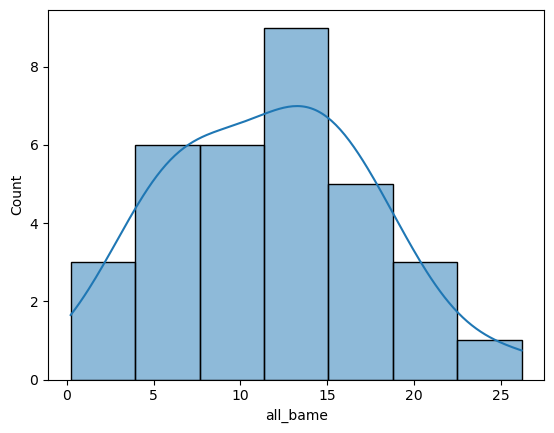

In [229]:

# check distribution of  BAME within LAs
sns.histplot(final.all_bame, kde=True)



In [ ]:
Histogram: shows proportion of all ethnic groups in London boroughs, the highest proportion being 26

In [230]:
# number of unique variabls by column
final.nunique(axis=0)


allindian                  33
pakistaniOR_Bangladeshi    32
all_black                  33
all_bame                   33
Diabetessum                33
heart_diseasesum           33
sum_over70                 33
sum_insecure               33
Child_poverty_sum          32
deprivationscore           33
sumdeaths                  31
total_patients             33
Hypertensionsum            33
Obesitysum                 33
Asthmasum                  32
sum_at_risk_jobs           33
sum_population             33
dtype: int64

In [231]:

# what is the shape of the data
final.shape



(33, 17)

check for variances when calculating the standard deviation. It can be seen below that variances are large so standardisation will be required so that variables can be compared. convert to sample variance of 1 and sample mean of 0.

In [232]:
# show standard deviation
final.apply(np.std)


allindian                      2.032901
pakistaniOR_Bangladeshi        2.210705
all_black                      2.685261
all_bame                       5.820511
Diabetessum                   51.654984
heart_diseasesum              20.547277
sum_over70                     1.002472
sum_insecure                   2.419431
Child_poverty_sum              2.043176
deprivationscore            1204.052036
sumdeaths                     64.813953
total_patients             86687.930020
Hypertensionsum              101.736443
Obesitysum                    61.887381
Asthmasum                     37.646915
sum_at_risk_jobs               2.476646
sum_population             74470.994740
dtype: float64

In [233]:
#variance calculated
final.var() 


allindian                  4.261832e+00
pakistaniOR_Bangladeshi    5.039941e+00
all_black                  7.435958e+00
all_bame                   3.493705e+01
Diabetessum                2.751620e+03
heart_diseasesum           4.353841e+02
sum_over70                 1.036354e+00
sum_insecure               6.036570e+00
Child_poverty_sum          4.305024e+00
deprivationscore           1.495046e+06
sumdeaths                  4.332125e+03
total_patients             7.749635e+09
Hypertensionsum            1.067375e+04
Obesitysum                 3.949737e+03
Asthmasum                  1.461581e+03
sum_at_risk_jobs           6.325454e+00
sum_population             5.719239e+09
dtype: float64

## standardisation:
 standardisation required in order to compare the variables as standard deviations are different - standardise each variable so that it has a sample variance of 1 and sample mean of 0. 

In [234]:
#check  correlation between independent variables
df= final.drop('sumdeaths',1)
df.corr()



C:\Users\TEMP\AppData\Local\Temp\ipykernel_23536\2084252163.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df= final.drop('sumdeaths',1)


,allindian,pakistaniOR_Bangladeshi,all_black,all_bame,Diabetessum,heart_diseasesum,sum_over70,sum_insecure,Child_poverty_sum,deprivationscore,total_patients,Hypertensionsum,Obesitysum,Asthmasum,sum_at_risk_jobs,sum_population
allindian,1.000000,0.280117,0.064441,0.659134,0.683709,0.497715,0.324513,0.464501,0.322835,0.201698,0.470680,0.438247,0.349417,0.367138,0.393478,0.397302
pakistaniOR_Bangladeshi,0.280117,1.000000,0.082645,0.567500,0.343616,0.035084,-0.203701,0.319374,0.606211,0.327425,0.327242,0.005381,0.221855,0.138365,0.259466,0.325921
all_black,0.064441,0.082645,1.000000,0.673100,0.516673,0.150854,0.027878,0.706488,0.737099,0.855122,0.621560,0.433284,0.669098,0.529240,0.660657,0.592220
all_bame,0.659134,0.567500,0.673100,1.000000,0.808639,0.387557,0.136860,0.793600,0.839256,0.781860,0.799623,0.511375,0.666742,0.592870,0.715544,0.743321
Diabetessum,0.683709,0.343616,0.516673,0.808639,1.000000,0.818044,0.621056,0.908580,0.780448,0.679740,0.850948,0.879795,0.883641,0.863687,0.915329,0.846175
heart_diseasesum,0.497715,0.035084,0.150854,0.387557,0.818044,1.000000,0.932759,0.663336,0.404346,0.329762,0.660758,0.944526,0.721981,0.853943,0.781449,0.708529
sum_over70,0.324513,-0.203701,0.027878,0.136860,0.621056,0.932759,1.000000,0.467221,0.151451,0.138622,0.510302,0.871221,0.546906,0.738678,0.621460,0.569264
sum_insecure,0.464501,0.319374,0.706488,0.793600,0.908580,0.663336,0.467221,1.000000,0.872630,0.813589,0.846575,0.811715,0.942525,0.815948,0.955274,0.836664
Child_poverty_sum,0.322835,0.606211,0.737099,0.839256,0.780448,0.404346,0.151451,0.872630,1.000000,0.879166,0.786860,0.571113,0.826970,0.686127,0.828041,0.781948
deprivationscore,0.201698,0.327425,0.855122,0.781860,0.679740,0.329762,0.138622,0.813589,0.879166,1.000000,0.797393,0.536101,0.795093,0.635645,0.754959,0.784877


In [235]:
# run correlations on all variables using pearsons
final.corr()


,allindian,pakistaniOR_Bangladeshi,all_black,all_bame,Diabetessum,heart_diseasesum,sum_over70,sum_insecure,Child_poverty_sum,deprivationscore,sumdeaths,total_patients,Hypertensionsum,Obesitysum,Asthmasum,sum_at_risk_jobs,sum_population
allindian,1.000000,0.280117,0.064441,0.659134,0.683709,0.497715,0.324513,0.464501,0.322835,0.201698,0.665155,0.470680,0.438247,0.349417,0.367138,0.393478,0.397302
pakistaniOR_Bangladeshi,0.280117,1.000000,0.082645,0.567500,0.343616,0.035084,-0.203701,0.319374,0.606211,0.327425,0.177015,0.327242,0.005381,0.221855,0.138365,0.259466,0.325921
all_black,0.064441,0.082645,1.000000,0.673100,0.516673,0.150854,0.027878,0.706488,0.737099,0.855122,0.524773,0.621560,0.433284,0.669098,0.529240,0.660657,0.592220
all_bame,0.659134,0.567500,0.673100,1.000000,0.808639,0.387557,0.136860,0.793600,0.839256,0.781860,0.775347,0.799623,0.511375,0.666742,0.592870,0.715544,0.743321
Diabetessum,0.683709,0.343616,0.516673,0.808639,1.000000,0.818044,0.621056,0.908580,0.780448,0.679740,0.903598,0.850948,0.879795,0.883641,0.863687,0.915329,0.846175
heart_diseasesum,0.497715,0.035084,0.150854,0.387557,0.818044,1.000000,0.932759,0.663336,0.404346,0.329762,0.748962,0.660758,0.944526,0.721981,0.853943,0.781449,0.708529
sum_over70,0.324513,-0.203701,0.027878,0.136860,0.621056,0.932759,1.000000,0.467221,0.151451,0.138622,0.614894,0.510302,0.871221,0.546906,0.738678,0.621460,0.569264
sum_insecure,0.464501,0.319374,0.706488,0.793600,0.908580,0.663336,0.467221,1.000000,0.872630,0.813589,0.801861,0.846575,0.811715,0.942525,0.815948,0.955274,0.836664
Child_poverty_sum,0.322835,0.606211,0.737099,0.839256,0.780448,0.404346,0.151451,0.872630,1.000000,0.879166,0.631430,0.786860,0.571113,0.826970,0.686127,0.828041,0.781948
deprivationscore,0.201698,0.327425,0.855122,0.781860,0.679740,0.329762,0.138622,0.813589,0.879166,1.000000,0.647293,0.797393,0.536101,0.795093,0.635645,0.754959,0.784877


In [236]:
# rum correlations on all variables using spearmans
corrspear = final.corr(method ="spearman")
print(corrspear)


                         allindian  pakistaniOR_Bangladeshi  all_black  \
allindian                 1.000000                 0.706944   0.255013   
pakistaniOR_Bangladeshi   0.706944                 1.000000   0.359489   
all_black                 0.255013                 0.359489   1.000000   
all_bame                  0.620655                 0.714632   0.709893   
Diabetessum               0.713235                 0.485168   0.519385   
heart_diseasesum          0.639372                 0.186346   0.174799   
sum_over70                0.428476                -0.080889  -0.017045   
sum_insecure              0.565174                 0.428679   0.729612   
Child_poverty_sum         0.394251                 0.556243   0.820590   
deprivationscore          0.321524                 0.500543   0.867981   
sumdeaths                 0.630286                 0.407355   0.636637   
total_patients            0.559826                 0.531796   0.657420   
Hypertensionsum           0.516043    

###  observing the top N correlations

The mosthighlycorrelated() functions taken from https://python-for-multivariate-analysis.readthedocs.io/_/downloads/en/latest/pdf/ will be applied to return the linear correlation coefficients for pairs of variables. 



In [237]:
# code obtained from https://python-for-multivariate-analysis.readthedocs.io/_/downloads/en/latest/pdf/
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [239]:
mosthighlycorrelated(final, 10)
#mosthighlycorrelated(final, 10)


,FirstVariable,SecondVariable,Correlation
0,total_patients,sum_population,0.979376
1,sum_insecure,sum_at_risk_jobs,0.955274
2,Obesitysum,sum_at_risk_jobs,0.945709
3,heart_diseasesum,Hypertensionsum,0.944526
4,sum_insecure,Obesitysum,0.942525
5,Hypertensionsum,Asthmasum,0.937765
6,heart_diseasesum,sum_over70,0.932759
7,Asthmasum,sum_at_risk_jobs,0.926222
8,Diabetessum,sum_at_risk_jobs,0.915329
9,Diabetessum,sum_insecure,0.908580


## Visualise  bame vs sumdeaths

C:\Users\lolap\new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='all_bame', ylabel='sumdeaths'>

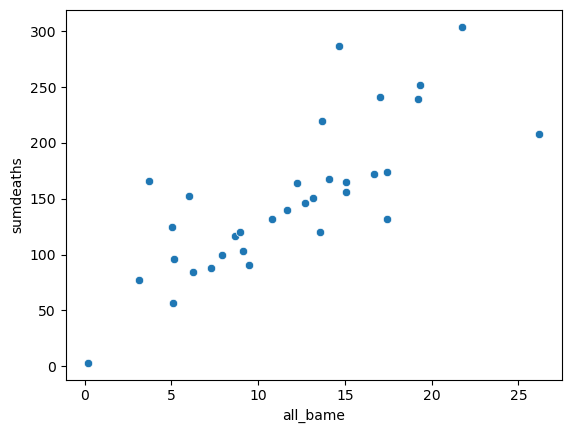

In [245]:
sns.scatterplot(data.all_bame, data.sumdeaths)



### There is a positive correlation that is as allbame goes up so does covid deaths

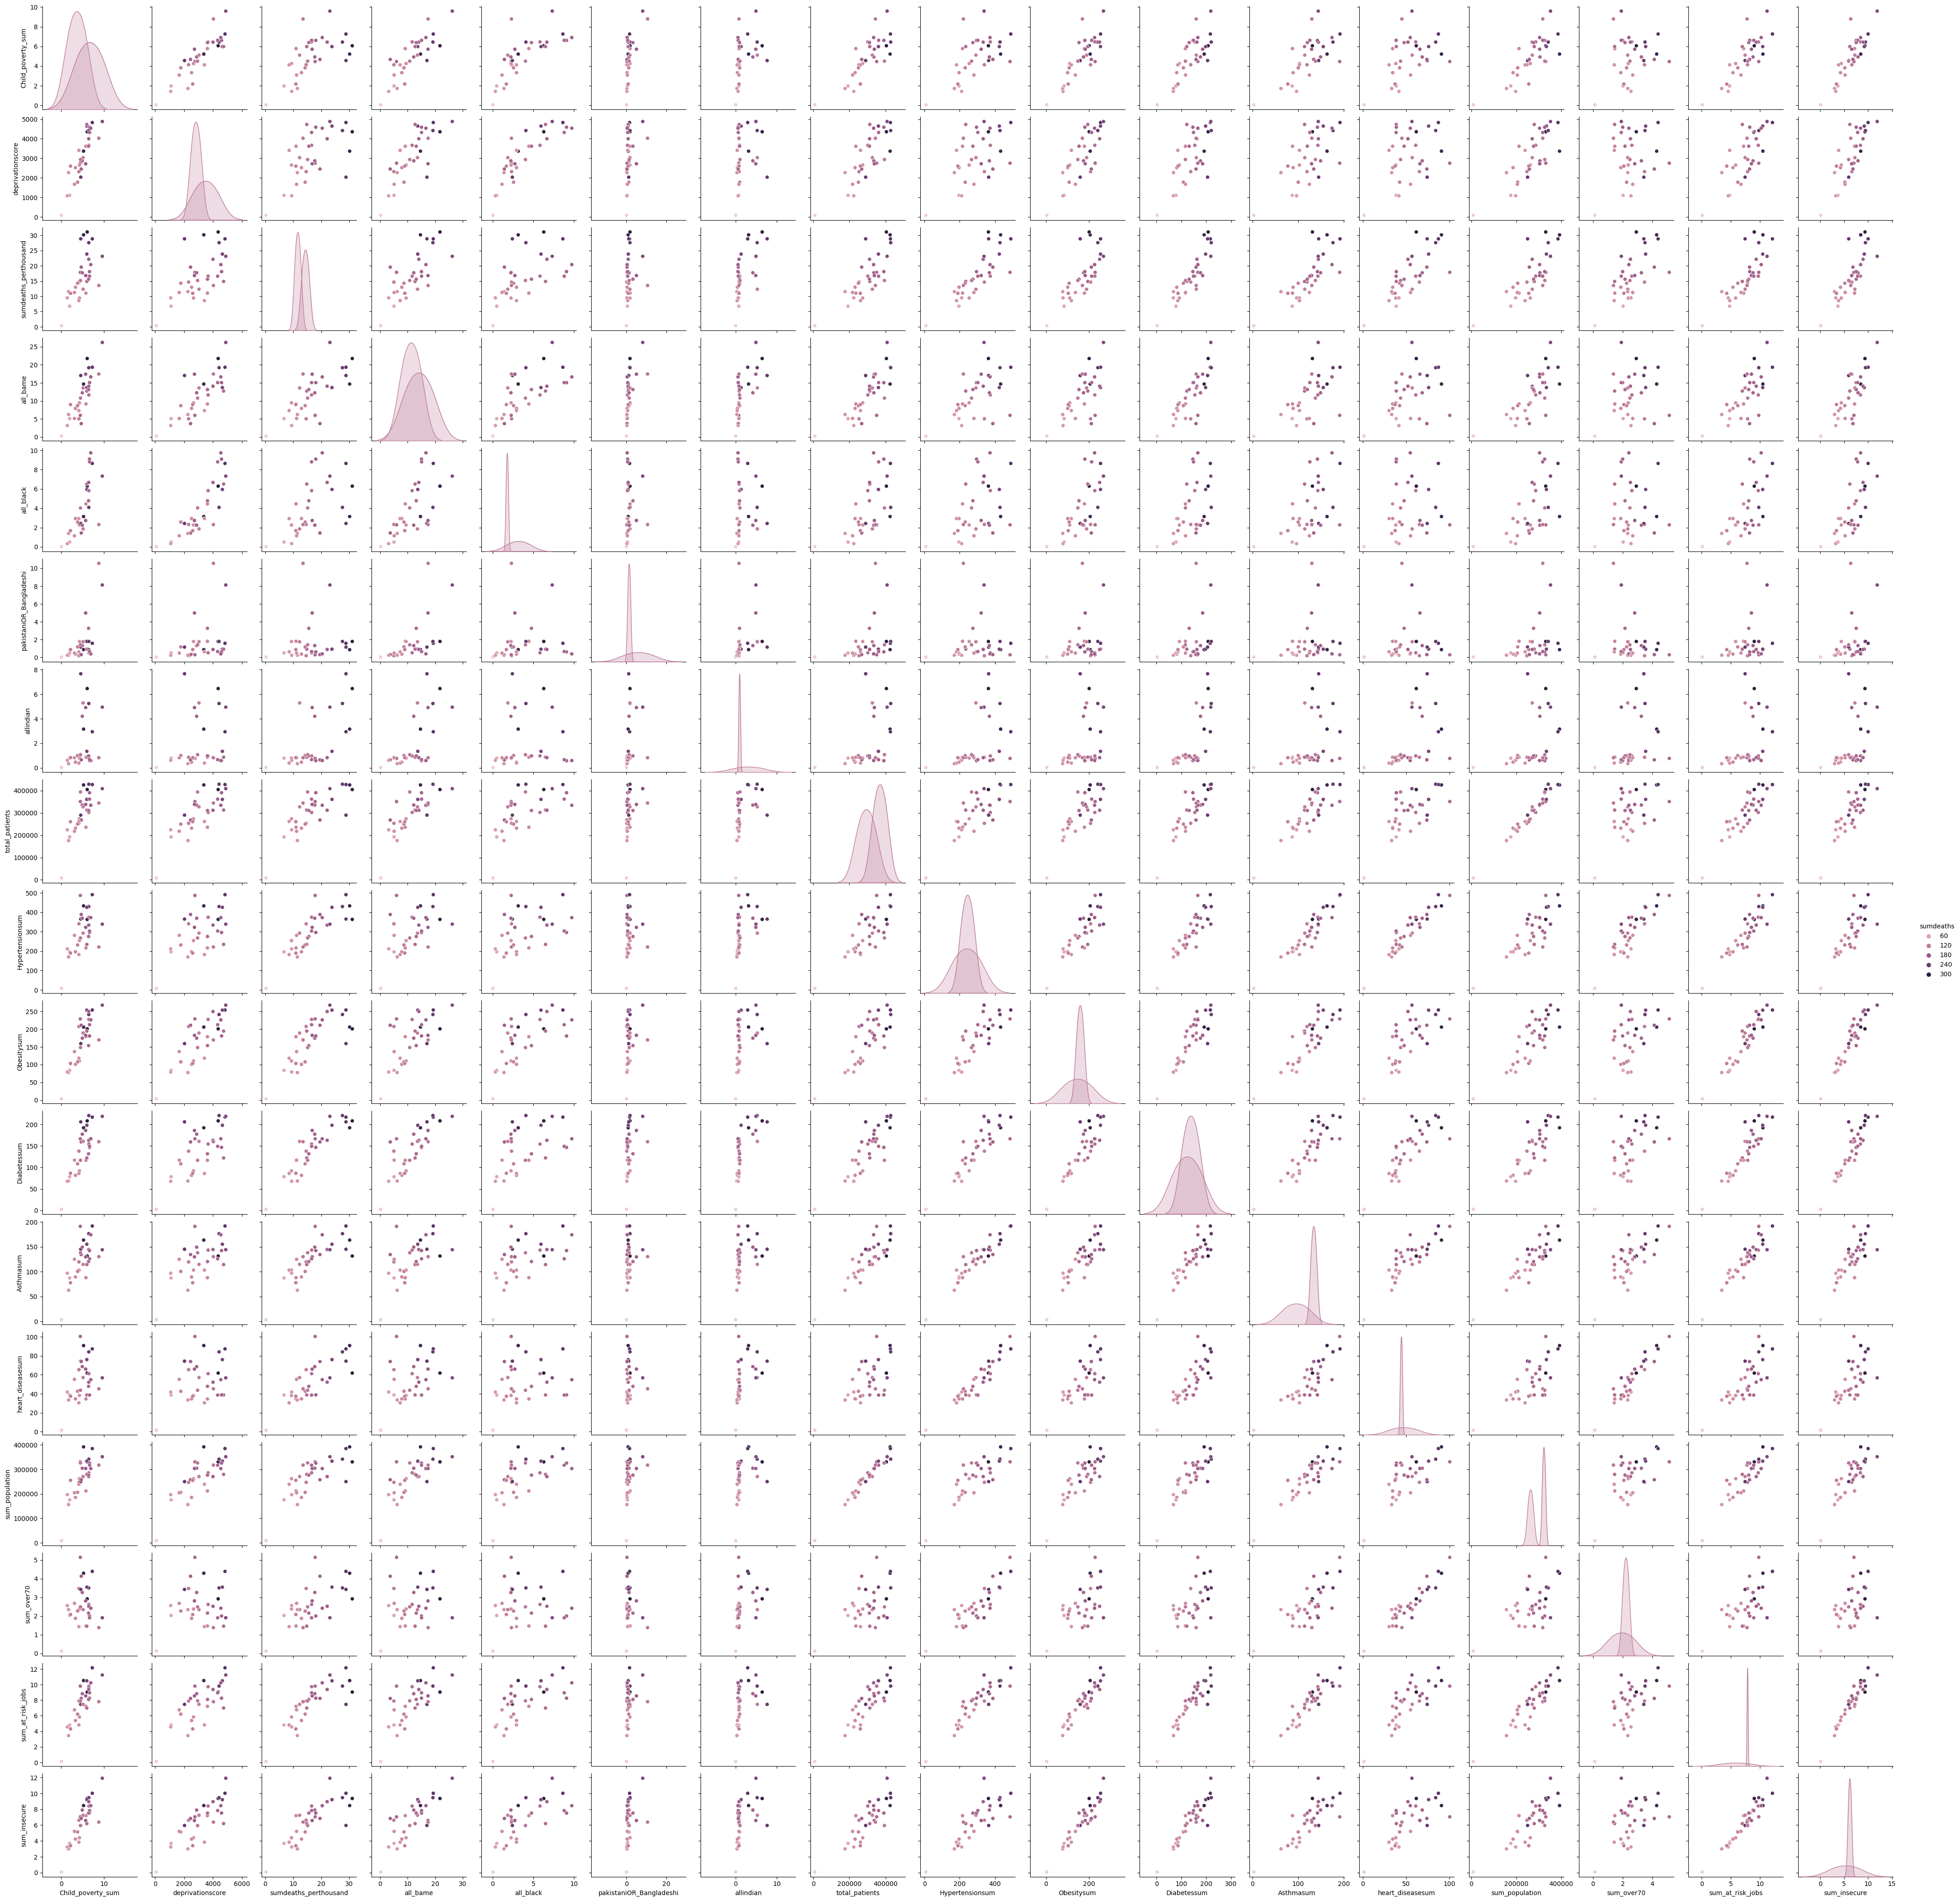

In [242]:

sns.pairplot(data, hue='sumdeaths')
plt.show()


In [129]:
#sns.pairplot(data[['all_bame','allindian','pakistaniOR_Bangladeshi','all_black']], hue='sumdeaths')
#g =sns.pairplot(data, vars=['all_bame','allindian','pakistaniOR_Bangladeshi','all_black'],hue='sumdeaths')

# Multivariate analysis


## regression model 1 all variables

In [246]:


X = final.iloc[:,[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16]] #INDEPENDENT
Y = final.iloc[:,2] #DEPENDENT


In [248]:
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
predictions=model.predict(X)
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:              all_black   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     31.12
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           4.67e-09
Time:                        08:52:08   Log-Likelihood:                -22.178
No. Observations:                  33   AIC:                             78.36
Df Residuals:                      16   BIC:                             103.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# Using Random Forest for feature selection
- 
MODEL 1 : problems with multicollinearity so feature selection required

RandomForestRegressor(max_depth=10, random_state=1)

In [263]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor(random_state=1, max_depth=10)
df=pd.get_dummies(df)
model.fit(df,final.sumdeaths)

RandomForestRegressor(max_depth=10, random_state=1)

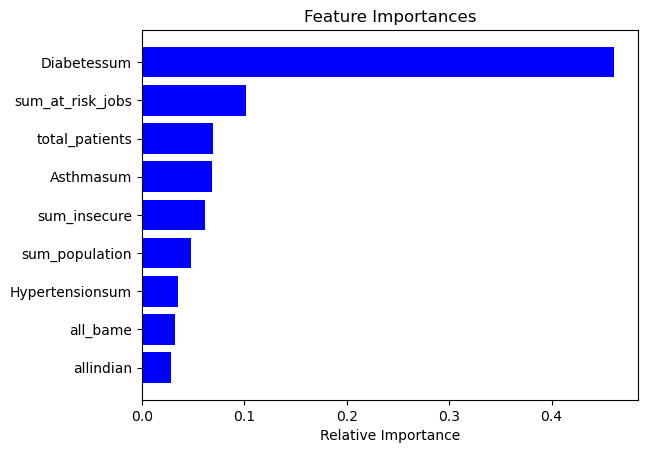

In [264]:
features = df.columns
importances = model.feature_importances_
indices=np.argsort(importances)[-9:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices],color='b',align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Regression on random forest feature selection (model 2)

In [274]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm


all_forest =data[['Diabetessum','Asthmasum','sumdeaths','total_patients','all_bame','sum_insecure','Hypertensionsum',
                   'sum_population','allindian','Obesitysum']]
x = all_forest[['Diabetessum','all_bame','Asthmasum','total_patients','sum_insecure','Hypertensionsum',
                'sum_population','allindian','Obesitysum']]
y = all_forest['sumdeaths']
 
# using sklearn
regrfr = linear_model.LinearRegression()
regrfr.fit(x,y)
print('intercept: \n', regrfr.intercept_)
print('Coefficients: \n', regrfr.coef_)


# using statsmodels

x=sm.add_constant(x)
modelf=sm.OLS(y,x).fit()
print(modelf.summary())

predictions=modelf.predict(x)
print_modelf=modelf.summary()
print(modelf.summary())





### STATSMODELS ###

lmft = smf.ols(formula ='sumdeaths ~ all_bame+Diabetessum+Asthmasum+total_patients+sum_insecure+Hypertensionsum+sum_population+allindian+Obesitysum', data=data).fit()
lmft.params



intercept: 
 -14.079946430096925
Coefficients: 
 [ 1.07066590e+00  4.14340059e+00 -1.40681284e+00  5.89537452e-04
 -6.69488935e+00  6.55382641e-01 -4.11210501e-04 -8.14170732e+00
 -3.78565406e-01]
                            OLS Regression Results                            
Dep. Variable:              sumdeaths   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     22.68
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           2.13e-09
Time:                        09:08:22   Log-Likelihood:                -146.70
No. Observations:                  33   AIC:                             313.4
Df Residuals:                      23   BIC:                             328.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
             

Intercept         -14.079946
all_bame            4.143401
Diabetessum         1.070666
Asthmasum          -1.406813
total_patients      0.000590
sum_insecure       -6.694889
Hypertensionsum     0.655383
sum_population     -0.000411
allindian          -8.141707
Obesitysum         -0.378565
dtype: float64

## Output random forest model 2:
strong multicollinearity and BAME is not significant factor

## Creating standardized input matrices
standardised regression coefficients created to estimate effect size independent of units.z-scores used to standardize setting mean =0 and standard deviation to 1.0 producing standardised regression coefficients


In [276]:
# standardising the dependent variable
from scipy import stats
Y=final['sumdeaths']
Y_norm = pd.Series(stats.zscore(Y), name=Y.name)
Y_norm.head(3)



0   -2.268030
1   -0.725153
2    2.113742
Name: sumdeaths, dtype: float64

In [277]:
df.head(3)

,allindian,pakistaniOR_Bangladeshi,all_black,all_bame,Diabetessum,heart_diseasesum,sum_over70,sum_insecure,Child_poverty_sum,deprivationscore,total_patients,Hypertensionsum,Obesitysum,Asthmasum,sum_at_risk_jobs,sum_population
0,0.029,0.034,0.026,0.214,2.70,1.50,0.124,0.078,0.053,88.8,8584,7.95,3.62,3.08,0.121,8706
1,0.862,1.805,4.451,9.147,116.51,34.45,1.468,7.189,5.770,3617.2,235900,216.29,178.67,87.81,7.202,211998
2,3.154,0.869,3.143,14.662,192.08,90.85,4.291,8.467,5.212,3366.0,425715,432.72,205.71,163.45,10.516,392140


In [278]:
X1_norm =df
X1_norm.head(3)



,allindian,pakistaniOR_Bangladeshi,all_black,all_bame,Diabetessum,heart_diseasesum,sum_over70,sum_insecure,Child_poverty_sum,deprivationscore,total_patients,Hypertensionsum,Obesitysum,Asthmasum,sum_at_risk_jobs,sum_population
0,0.029,0.034,0.026,0.214,2.70,1.50,0.124,0.078,0.053,88.8,8584,7.95,3.62,3.08,0.121,8706
1,0.862,1.805,4.451,9.147,116.51,34.45,1.468,7.189,5.770,3617.2,235900,216.29,178.67,87.81,7.202,211998
2,3.154,0.869,3.143,14.662,192.08,90.85,4.291,8.467,5.212,3366.0,425715,432.72,205.71,163.45,10.516,392140


In [282]:
X1_norm =df
X1_norm =pd.DataFrame(stats.zscore(X1_norm))
X1_norm =sm.add_constant(X1_norm)
check=pd.concat([round(X1_norm.mean(axis=0),5),round(X1_norm.std(axis=0,ddof=0),5)], axis=1)
check.columns=["mean","std dev"]
check




,mean,std dev
const,1.0,0.0
allindian,-0.0,1.0
pakistaniOR_Bangladeshi,-0.0,1.0
all_black,0.0,1.0
all_bame,-0.0,1.0
Diabetessum,-0.0,1.0
heart_diseasesum,0.0,1.0
sum_over70,-0.0,1.0
sum_insecure,-0.0,1.0
Child_poverty_sum,0.0,1.0


In [283]:
X1_norm =df
X1_norm =pd.DataFrame(stats.zscore(X1_norm))
X1_norm =sm.add_constant(X1_norm)
check=pd.concat([round(X1_norm.mean(axis=0),5),round(X1_norm.std(axis=0,ddof=0),5)], axis=1)
check.columns=["mean","std dev"]
check


,mean,std dev
const,1.0,0.0
allindian,-0.0,1.0
pakistaniOR_Bangladeshi,-0.0,1.0
all_black,0.0,1.0
all_bame,-0.0,1.0
Diabetessum,-0.0,1.0
heart_diseasesum,0.0,1.0
sum_over70,-0.0,1.0
sum_insecure,-0.0,1.0
Child_poverty_sum,0.0,1.0


### Running the standardized regression 3
Statsmodels


In [284]:
#ols model on standardised data

modstd = sm.OLS(Y_norm,X1_norm)
modstd_res = modstd.fit()
modstd_res.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sumdeaths   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     19.23
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           1.68e-07
Time:                        09:13:06   Log-Likelihood:                 2.7911
No. Observations:                  33   AIC:                             28.42
Df Residuals:                      16   BIC:                             53.86
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2.776e-17      0.056  -4.99e-16      1.000      -0.118       0.118
allindian                  -0.3146      0.246     -1.279      0.219      -0.836       0.207
pakistaniOR_Bangladeshi    -0.4725      0.246     -1.922      0.073      -0.994       0.049
all_black                   0.2946      0.306      0.962      0.350      -0.355       0.944
all_bame                    0.4289      0.410      1.046      0.311      -0.441       1.298
Diabetessum                 1.3299      0.453      2.937      0.010       0.370       2.290
heart_diseasesum            0.8770      0.490      1.791      0.092      -0.161       1.915
sum_over70                  0.4764      0.397      1.200      0.248      -0.365       1.318
sum_insecure                0.4121      0.432      0.955      0.354      -0.503       1.327
Child_poverty_sum           0.2916      0.397      0.734      0.474      -0.551       1.134
deprivationscore           -0.1213      0.295     -0.412      0.686      -0.746       0.504
total_patients             -0.1401      0.479     -0.292      0.774      -1.156       0.876
Hypertensionsum            -1.2823      0.777     -1.650      0.118      -2.929       0.365
Obesitysum                 -0.5607      0.288     -1.944      0.070      -1.172       0.051
Asthmasum                  -0.3884      0.309     -1.257      0.227      -1.043       0.266
sum_at_risk_jobs           -0.4548      0.648     -0.702      0.493      -1.829       0.920
sum_population              0.4890      0.496      0.986      0.339      -0.562       1.540
==============================================================================
Omnibus:                        0.286   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.007
Skew:                           0.035   Prob(JB):                        0.996
Kurtosis:                       3.022   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### the regression results USING coefficients from standardised data

diabetes and obesity are some of the most important drivers of covid deaths. Variable reduction is still required

###   feature selection 2 below

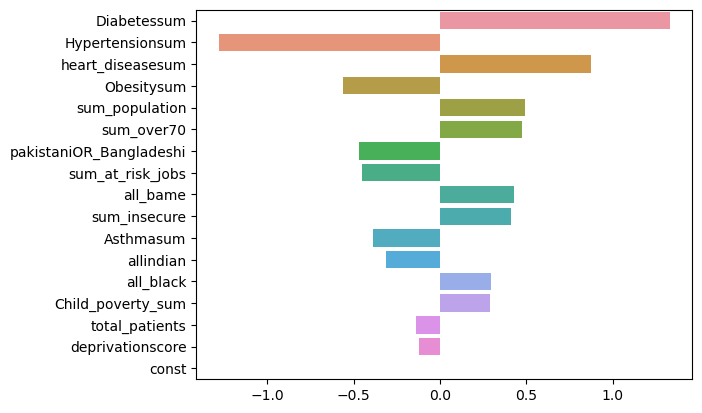

In [285]:

coeff = modstd_res.params
coeff = coeff.iloc[(coeff.abs()*-1.0).argsort()]
sns.barplot(x=coeff.values, y=coeff.index, orient='h');




## plotting the least square line for features selected

C:\Users\lolap\new\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


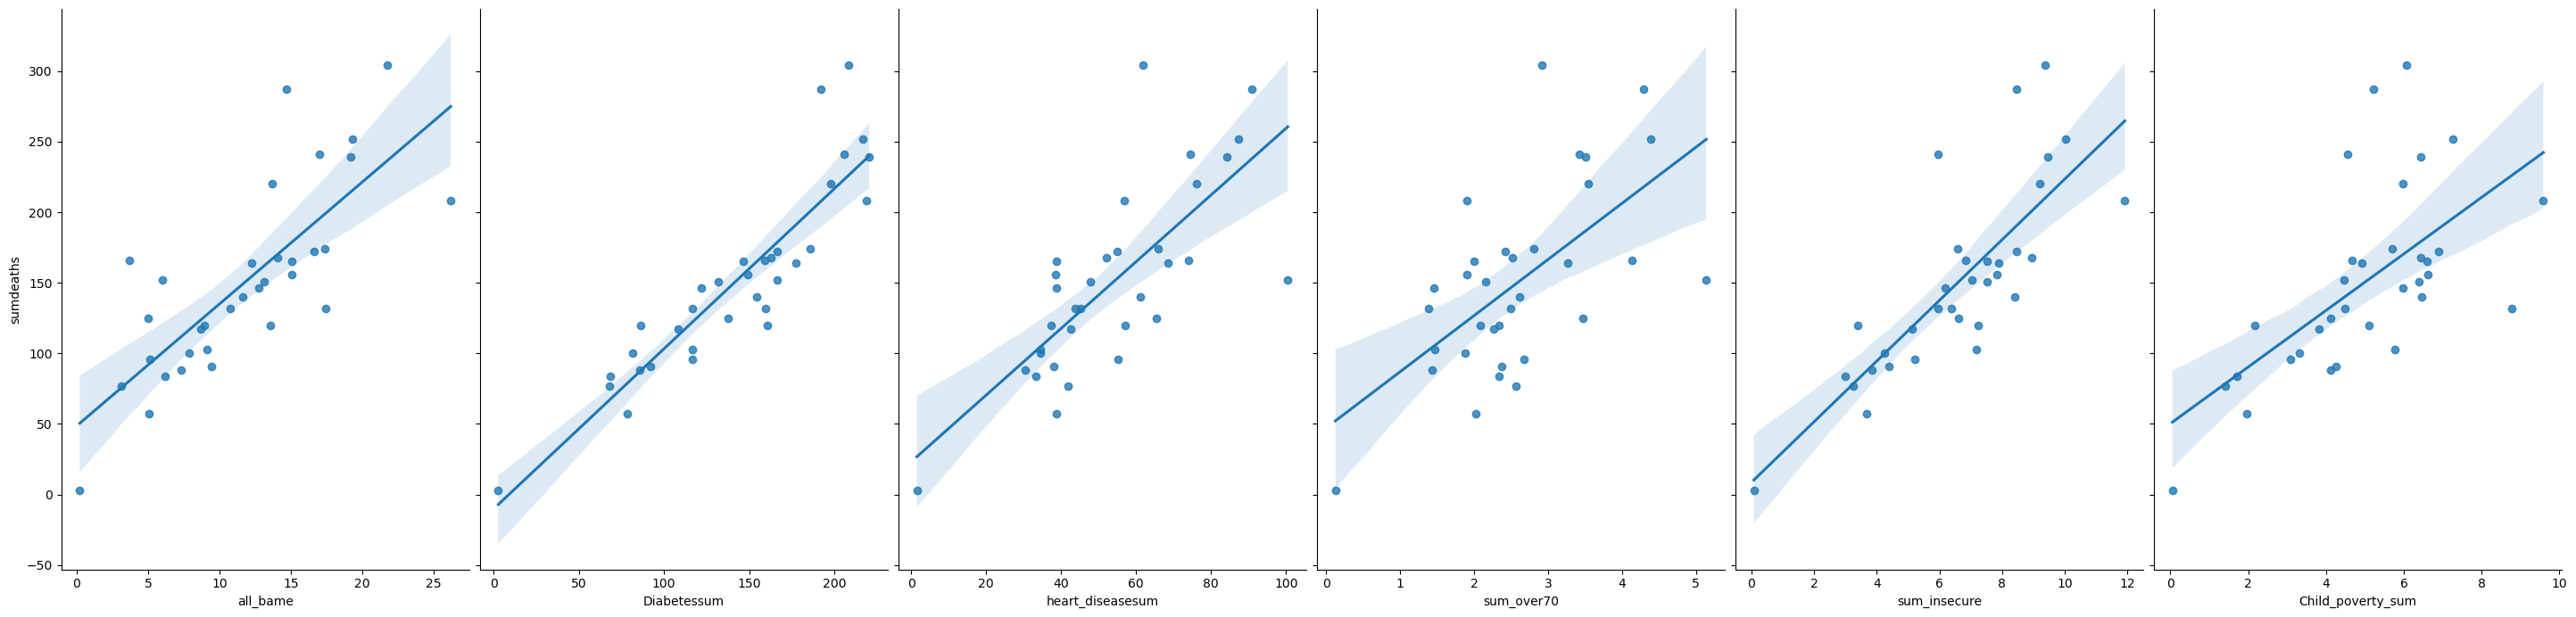

In [286]:

sns.pairplot(data, x_vars= ['all_bame','Diabetessum','heart_diseasesum','sum_over70','sum_insecure','Child_poverty_sum'],
             y_vars='sumdeaths',size=7, aspect=0.7, kind='reg')

# regression 4 with reduced standardised features


## regression 4a
standardised all : 

In [309]:
all_norm2=data[['Diabetessum','heart_diseasesum','sum_over70','all_black','sum_population','all_bame','sum_insecure','Child_poverty_sum']]
all_norm2=pd.DataFrame(stats.zscore(all_norm2))
all_norm2=sm.add_constant(all_norm2)
check2=pd.concat([round(all_norm2.mean(axis=0),5),round(all_norm2.std(axis=0,ddof=0),5)], axis=1)
check2.columns=["mean","std dev"]
check2

,mean,std dev
const,1.0,0.0
Diabetessum,-0.0,1.0
heart_diseasesum,0.0,1.0
sum_over70,-0.0,1.0
all_black,0.0,1.0
sum_population,-0.0,1.0
all_bame,-0.0,1.0
sum_insecure,-0.0,1.0
Child_poverty_sum,0.0,1.0


In [310]:

modstd2 = sm.OLS(Y_norm,all_norm2)
modstd_res2 = modstd1.fit()
modstd_res2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sumdeaths   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     33.97
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           4.18e-11
Time:                        10:08:51   Log-Likelihood:                -10.868
No. Observations:                  33   AIC:                             35.74
Df Residuals:                      26   BIC:                             46.21
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.776e-17      0.066  -4.21e-16      1.000      -0.136       0.136
Diabetessum           0.5948      0.375      1.584      0.125      -0.177       1.367
heart_diseasesum     -0.4144      0.367     -1.129      0.269      -1.169       0.340
sum_over70            0.5532      0.271      2.043      0.051      -0.003       1.110
all_bame              0.5484      0.194      2.821      0.009       0.149       0.948
sum_insecure          0.1058      0.212      0.499      0.622      -0.331       0.542
Child_poverty_sum    -0.3016      0.182     -1.654      0.110      -0.676       0.073
==============================================================================
Omnibus:                        6.340   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.778
Skew:                           0.736   Prob(JB):                       0.0917
Kurtosis:                       4.143   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [293]:
### STATSMODELS ###

lm1 = smf.ols(formula='sumdeaths ~ all_bame+all_black+sum_population+Diabetessum+heart_diseasesum+sum_over70+sum_insecure+Child_poverty_sum', data=data).fit()

# print the coefficients
lm1.params

Intercept           -20.027436
all_bame              4.319029
all_black             3.972316
sum_population        0.000139
Diabetessum           0.958390
heart_diseasesum     -0.647570
sum_over70           17.486292
sum_insecure         -0.966205
Child_poverty_sum   -14.678861
dtype: float64

In [294]:
### STATSMODELS ###

lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sumdeaths   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     26.31
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           4.47e-10
Time:                        09:24:32   Log-Likelihood:                -146.88
No. Observations:                  33   AIC:                             311.8
Df Residuals:                      24   BIC:                             325.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -20.0274     17.930     -1.117      0.275     -57.033      16.978
all_bame              4.3190      2.516      1.716      0.099      -0.874       9.513
all_black             3.9723      3.164      1.255      0.221      -2.559      10.503
sum_population        0.0001      0.000      0.888      0.383      -0.000       0.000
Diabetessum           0.9584      0.494      1.940      0.064      -0.061       1.978
heart_diseasesum     -0.6476      1.271     -0.510      0.615      -3.270       1.975
sum_over70           17.4863     20.926      0.836      0.412     -25.703      60.675
sum_insecure         -0.9662      6.374     -0.152      0.881     -14.121      12.188
Child_poverty_sum   -14.6789      6.939     -2.115      0.045     -29.000      -0.358
==============================================================================
Omnibus:                        6.868   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                5.246
Skew:                           0.842   Prob(JB):                       0.0726
Kurtosis:                       3.989   Cond. No.                     1.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## regression 4b with standardised features remove all black/allpopulation


C:\Users\lolap\new\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


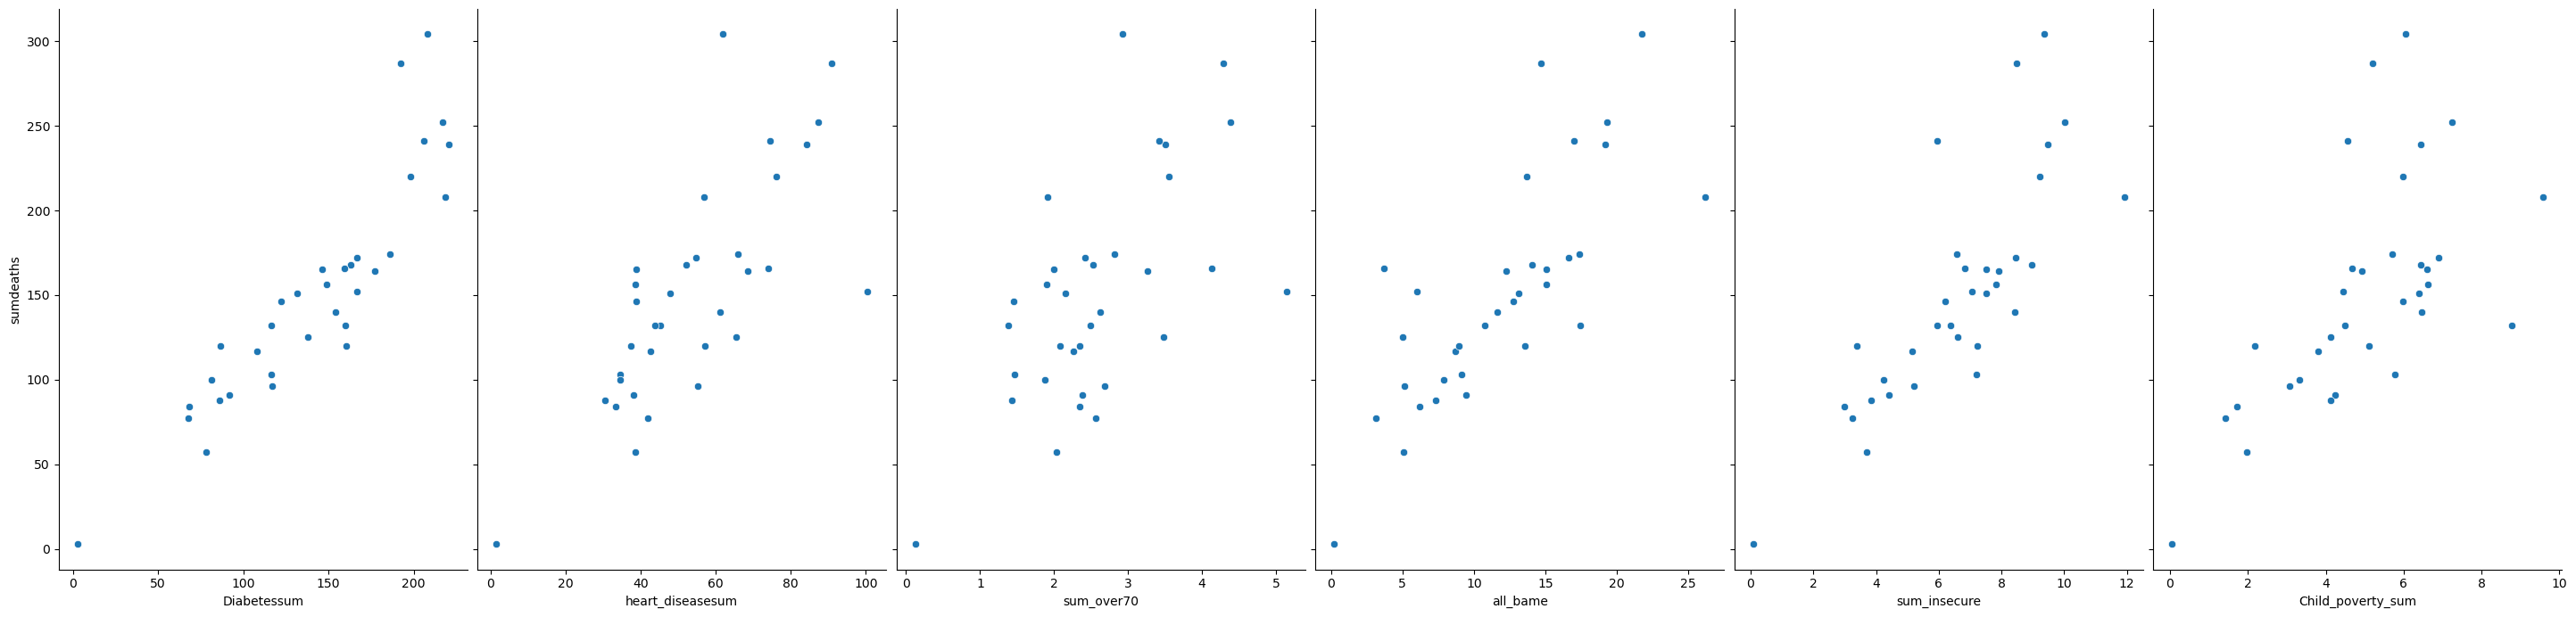

In [78]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(final, x_vars=['Diabetessum','heart_diseasesum','sum_over70','all_bame','sum_insecure','Child_poverty_sum'], y_vars='sumdeaths', size=7, aspect=0.7)


In [290]:




all_norm1=data[['Diabetessum','heart_diseasesum','sum_over70','all_bame','sum_insecure','Child_poverty_sum']]
all_norm1=pd.DataFrame(stats.zscore(all_norm1))
all_norm1=sm.add_constant(all_norm1)
check1=pd.concat([round(all_norm1.mean(axis=0),5),round(all_norm1.std(axis=0,ddof=0),5)], axis=1)
check1.columns=["mean","std dev"]
check1








,mean,std dev
const,1.0,0.0
Diabetessum,-0.0,1.0
heart_diseasesum,0.0,1.0
sum_over70,-0.0,1.0
all_bame,-0.0,1.0
sum_insecure,-0.0,1.0
Child_poverty_sum,0.0,1.0


In [291]:
#standardised data on OLS model



modstd1 = sm.OLS(Y_norm,all_norm1)
modstd_res1 = modstd1.fit()
modstd_res1.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sumdeaths   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     33.97
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           4.18e-11
Time:                        09:20:05   Log-Likelihood:                -10.868
No. Observations:                  33   AIC:                             35.74
Df Residuals:                      26   BIC:                             46.21
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.776e-17      0.066  -4.21e-16      1.000      -0.136       0.136
Diabetessum           0.5948      0.375      1.584      0.125      -0.177       1.367
heart_diseasesum     -0.4144      0.367     -1.129      0.269      -1.169       0.340
sum_over70            0.5532      0.271      2.043      0.051      -0.003       1.110
all_bame              0.5484      0.194      2.821      0.009       0.149       0.948
sum_insecure          0.1058      0.212      0.499      0.622      -0.331       0.542
Child_poverty_sum    -0.3016      0.182     -1.654      0.110      -0.676       0.073
==============================================================================
Omnibus:                        6.340   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.778
Skew:                           0.736   Prob(JB):                       0.0917
Kurtosis:                       4.143   Cond. No.                         16.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared of the model turns out to be 0.887 and  r-squared is 0.86.

This means that 88.7% of the variation in the covid deaths can be explained by six variables.

## Which other factors along with BAME contribute to Covid deaths?
What is the effect of each of these factors on Covid deaths?


##Can patterns between race and COVID-19 susceptibility be 
explained by other factors such as socioeconomic 
background/underlying medical conditions?

For a given proportion of Diabetessum, heart_diseasesum, sum_over70, sum_insecure, Child_poverty_sum, an increase of 1 unit of bame is associated with an increase in covid deaths of 5 units.




over 70s,Diabetessum, heart_diseasesum, sum_insecure, Child_poverty_sum all have large p-value

Fail to reject the null hypothesis for over 70s, Diabetessum, heart_diseasesum, sum_insecure, Child_poverty_sum
There is no association
all bame is positively associated with covid deaths
reject the null hypothesis for all bame



## FITTED MODEL FOR BAME ONLY: regression 5
Is there a relationship between BAME and Covid deaths?
How strong is that relationship?


In [307]:
### STATSMODELS ###

lm2 = smf.ols(formula='sumdeaths ~ all_bame', data=data).fit()
lm2.params
lm2.summary()
              

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sumdeaths   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     46.73
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           1.17e-07
Time:                        09:44:10   Log-Likelihood:                -169.32
No. Observations:                  33   AIC:                             342.6
Df Residuals:                      31   BIC:                             345.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.6184     16.553      2.937      0.006      14.858      82.379
all_bame       8.6338      1.263      6.836      0.000       6.058      11.210
==============================================================================
Omnibus:                        4.960   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.723
Skew:                           0.805   Prob(JB):                        0.155
Kurtosis:                       3.336   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [308]:
### STATSMODELS coefficient estimation 
import statsmodels.formula.api as smf

### STATSMODELS ### Let's estimate the model coefficients for the data
import statsmodels.formula.api as smf

# create a fitted model
lm1 = smf.ols(formula='sumdeaths ~ all_bame', data=data).fit()
lm1.summary()
# print the coefficients
lm1.params




Intercept    48.618431
all_bame      8.633830
dtype: float64

In [298]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['all_bame']
X = data[feature_cols]
y = data.sumdeaths

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

48.61843135802505
[8.63382976]



covid deaths = (48.618)* all_bame

## Is there a relationship between BAME and Covid deaths?
How strong is that relationship?


A "unit" increase in allbame is associated with a 8.63 "unit" increase in covid deaths

Note here that the coefficients represent associations

## predictions: Given a certain proportion OF BAME  , can covid deaths be predicted?
if there were an increase of bame by a proportion of 0.5. What would we predict for covid deaths?

In [299]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'all_bame': [0.3]})

# predict for a new observation
lm1.predict(X_new)

0    51.20858
dtype: float64

 predict covid deaths of 51.

In [300]:
#confidence interval
### STATSMODELS ###

# print the confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,14.857559,82.379304
all_bame,6.057800,11.209859


In [301]:
#p values
### STATSMODELS ###


lm1.pvalues

Intercept    6.199126e-03
all_bame     1.167444e-07
dtype: float64

## hypothesis
in this case, the p-value for bame is far less than 0.05

Reject null hypothesis
There is a relationship between bame and covid deaths

In [302]:
### STATSMODELS ###

# print the R-squared value for the model
lm1.rsquared

0.60116300106603

Adjusted R-Square - Reflects the fit and predictive power of the model with the value being 0 to 1. A high Adjusted R square value is desired. Here the Adj R-sq. value is 0.86 indicating a good fit. but the r squared is 0.60

## conclusion for regression 4b using standardised data
Interpretation:

Regression equation is
Covid deaths = (constant)-2.776e17+0.5484*allbame+0.5522*sum_over70+-0.4144*heart_diseasesum+0.5948*Diabetessum+0.1058*sum_insecure+0.3016*Child_poverty_sum

This model4b has a higher R-squared (0.88) than model 5 
This model provides a better fit to the data than regression model 5 with only all bame which is 0.60
Adjusted R-Square - Reflects the fit and predictive power of the model with the value being 0 to 1.
Here the Adj R-sq. value is 0.86 indicating good fit.
R-Squared is 0.88 which is higher than model 4 which is .60